# Example of adding multiple scene objects of different number of modules per row


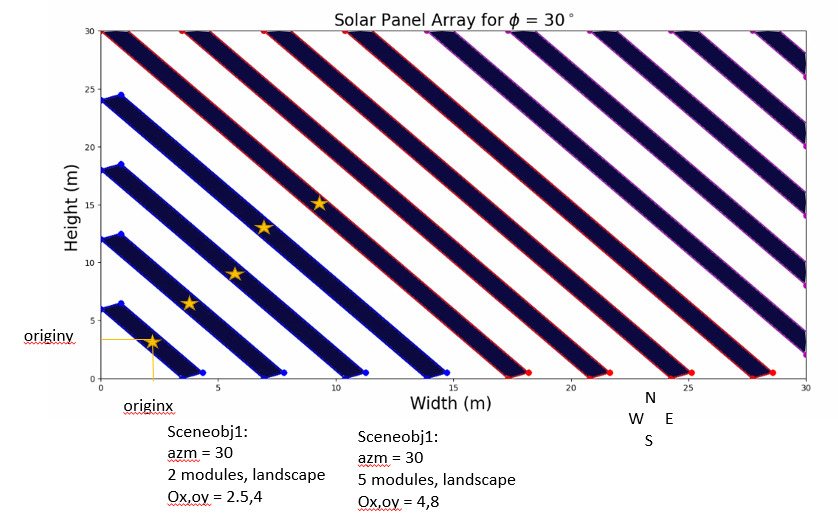

In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'bifacial_radiance' / 'TEMP' / 'Sabin')
if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)
    
from bifacial_radiance import RadianceObj, AnalysisObj    

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Sabin


In [2]:
# Import the lib

import bifacial_radiance
import os
from pathlib import Path
import numpy as np
import pandas as pd

# inputs
name='Testrun_UD_2'

# Location 

la = 40.0583  # NJ
lo = -74.4057  # NJ

# MakeModule Parameters

moduletype='test-module'
numpanels = 1 # [ numbers of panels per unit ]
x = 2 # lenght of one panel 
y = 1 # width of one panel

# SceneDict Parameters
pitch = 0.0000001 # m
albedo = 0.2

yrs = 2021 # The year needed
hrs = 2990 # particular hours of the year

hub_height = 4.3 # m
#nMods = 6 # six modules per row.  # This Changes based on optimization
nRows = 1  # 3 row lenght of the list     # This Changes based on optimization

azimuth_ang=30 # Facing south
tilt =35 # tilt.


# Project Intro
# demo = Project


Project = RadianceObj(name, testfolder)
Project.setGround(albedo)
epwfile = Project.getEPW(la,lo) # NJ lat/lon 40.0583° N, 74.4057
metdata = Project.readWeatherFile(epwfile,coerce_year=yrs )
Project.gendaylit(hrs)

# Making module with all the variables

module=Project.makeModule(name=moduletype,x=x,y=y,numpanels=numpanels)



path = C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Sabin
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Getting weather file: USA_NJ_McGuire.AFB.724096_TMY3.epw
 ... OK!
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos

Module Name: test-module
Module test-module updated in module.json
Pre-existing .rad file objects\test-module.rad will be overwritten



In [17]:
#First row: Azimuth 180 facing south
# This is coming from your code somehow

originsx = [2.5, 4, 8]  # increase with number of rows
originsy = [4, 8, 10]
numModules = [2, 5, 10]

In [21]:
# Add scene objects in a loop example
# To do analysis on each object you add htis way, call it like sceneDictLast[0] in the analysis.moduleAnalysis function
# i.e. frontscan, backscan = analysis.moduleAnalysis(sceneDictLast[0], sensorsy=3, sensorsx=3, modWanted=1, rowWanted=1)

# FIRST Scene OBJECT

# ALL other Scene Objects LOOP:
sceneArray = []
for ii in range(0, len(numModules)): 
    # Right now I am not changing any parameters so it is just re-appending the same object multiple times.
    sceneDictRow = {'tilt':tilt,'pitch':pitch,'hub_height':hub_height,'azimuth':azimuth_ang, 'nMods': numModules[ii], 
                      'nRows': 1, 'originx': originsx[ii], 'originy': originsy[ii], 'appendRadfile':True }
    sceneArray.append(Project.makeScene(module=moduletype, sceneDict=sceneDictRow))


In [6]:
octfile = Project.makeOct(Project.getfilelist())

Created Testrun_UD_2.oct


In [7]:
!rvu -vf views\front.vp -e .01 -pe 0.3 -vp 1 -7.5 12 Testrun_UD_2.oct

In [12]:
analysis = AnalysisObj(octfile)

In [14]:
for ii in range(0, len(sceneArray)):
    sceneobject = sceneArray[ii]
    for modWanted in range(0, numModules[ii]):
        frontscan, backscan = analysis.moduleAnalysis(sceneobject, sensorsy=9, sensorsx=1, modWanted=modWanted)
        analysis.analysis(octfile, '_row_'+str(ii)+'_mod'+str(modWanted), frontscan, backscan) 

 FYI Modules and Rows start at index 1. Reindexing to modWanted 1
Linescan in process: _00_Row1_Module1_Front
Linescan in process: _00_Row1_Module1_Back
Saved: results\irr__00_Row1_Module1.csv
Linescan in process: _01_Row1_Module1_Front
Linescan in process: _01_Row1_Module1_Back
Saved: results\irr__01_Row1_Module1.csv
 FYI Modules and Rows start at index 1. Reindexing to modWanted 1
Linescan in process: _10_Row1_Module1_Front
Linescan in process: _10_Row1_Module1_Back
Saved: results\irr__10_Row1_Module1.csv
Linescan in process: _11_Row1_Module1_Front
Linescan in process: _11_Row1_Module1_Back
Saved: results\irr__11_Row1_Module1.csv
Linescan in process: _12_Row1_Module2_Front
Linescan in process: _12_Row1_Module2_Back
Saved: results\irr__12_Row1_Module2.csv
Linescan in process: _13_Row1_Module3_Front
Linescan in process: _13_Row1_Module3_Back
Saved: results\irr__13_Row1_Module3.csv
Linescan in process: _14_Row1_Module4_Front
Linescan in process: _14_Row1_Module4_Back
Saved: results\irr_

In [30]:
# Reduce time by not sampling all modules
for ii in range(0, len(sceneArray)):
    sceneobject = sceneArray[ii]
    for modWanted in range(0, numModules[ii]):
        if (modWanted <= 3) or (modWanted >= numModules[ii]-3):            
            frontscan, backscan = analysis.moduleAnalysis(sceneobject, sensorsy=9, sensorsx=1, modWanted=modWanted)
            analysis.analysis(octfile, '_row_'+str(ii)+'_mod'+str(modWanted), frontscan, backscan) 

# Model a steady state, selecting the 'center row', and the center module in that center row
sceneobject = sceneArray[int(len(sceneArray)/2)]
modWanted = int(numModules[int(len(sceneArray)/2)]/2)

frontscan, backscan = analysis.moduleAnalysis(sceneobject, sensorsy=9, sensorsx=1, modWanted=modWanted)
analysis.analysis(octfile, '_SteadyState_row_'+str(ii)+'_mod'+str(modWanted), frontscan, backscan) 

 FYI Modules and Rows start at index 1. Reindexing to modWanted 1
Linescan in process: _row_0_mod0_Row1_Module1_Front
Linescan in process: _row_0_mod0_Row1_Module1_Back
Saved: results\irr__row_0_mod0_Row1_Module1.csv
Linescan in process: _row_0_mod1_Row1_Module1_Front
Linescan in process: _row_0_mod1_Row1_Module1_Back
Saved: results\irr__row_0_mod1_Row1_Module1.csv
 FYI Modules and Rows start at index 1. Reindexing to modWanted 1
Linescan in process: _row_1_mod0_Row1_Module1_Front
Linescan in process: _row_1_mod0_Row1_Module1_Back
Saved: results\irr__row_1_mod0_Row1_Module1.csv
Linescan in process: _row_1_mod1_Row1_Module1_Front
Linescan in process: _row_1_mod1_Row1_Module1_Back
Saved: results\irr__row_1_mod1_Row1_Module1.csv
Linescan in process: _row_1_mod2_Row1_Module2_Front
Linescan in process: _row_1_mod2_Row1_Module2_Back
Saved: results\irr__row_1_mod2_Row1_Module2.csv
Linescan in process: _row_1_mod3_Row1_Module3_Front
Linescan in process: _row_1_mod3_Row1_Module3_Back
Saved: res

({'Wm2': [193.0252,
   193.05910000000003,
   193.0943,
   193.12929999999997,
   193.1645,
   193.1996,
   193.2346,
   193.26969999999997,
   193.3048],
  'x': [5.910564,
   5.869606,
   5.828649,
   5.787691,
   5.746734,
   5.705776,
   5.664818,
   5.623861,
   5.582903],
  'y': [7.289194,
   7.218253,
   7.147313,
   7.076372,
   7.005431,
   6.934491,
   6.86355,
   6.792609,
   6.721669],
  'z': [4.087772,
   4.145129,
   4.202487,
   4.259845,
   4.317202,
   4.37456,
   4.431917,
   4.489275,
   4.546633],
  'r': [193.0252,
   193.0591,
   193.0943,
   193.1293,
   193.1645,
   193.1996,
   193.2346,
   193.2697,
   193.3048],
  'g': [193.0252,
   193.0591,
   193.0943,
   193.1293,
   193.1645,
   193.1996,
   193.2346,
   193.2697,
   193.3048],
  'b': [193.0252,
   193.0591,
   193.0943,
   193.1293,
   193.1645,
   193.1996,
   193.2346,
   193.2697,
   193.3048],
  'mattype': ['a1.0.a0.test-module.6457',
   'a1.0.a0.test-module.6457',
   'a1.0.a0.test-module.6457',
   'a

In [27]:
for ii in range(0, len(numModules)):
    for modWanted in range(0, numModules[ii]):
        if (modWanted > 3) or (modWanted < numModules[ii]-3):            
            # Copy steady state value
        

In [ ]:
calculatePerformance()